In [1]:
import joblib
import matplotlib.pyplot as plt
from quadratic_weighted_kappa_edit import quadratic_weighted_kappa, onehalf_weighted_kappa, confusion_matrix, weighted_matrix, onehalf_weighted_matrix, linear_weighted_kappa
import numpy as np
from sklearn.metrics import cohen_kappa_score

In [3]:
a = joblib.load('asap1_new_adjudication')

FileNotFoundError: [Errno 2] No such file or directory: 'asap1_new_adjudication'

In [9]:
a

,essay,rater1_domain1,rater2_domain1,domain1_score,higher,mean,sum
0,"Dear local newspaper, I think effects computer...",4,4,8,4,4.0,8
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9,5,5.0,9
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7,4,4.0,7
3,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10,5,5.0,10
4,"Dear @LOCATION1, I know having computers has a...",4,4,8,4,4.0,8
...,...,...,...,...,...,...,...
1778,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4,4,8,4,4.0,8
1779,Do a adults and kids spend to much time on the...,3,4,7,4,4.0,7
1780,My opinion is that people should have computer...,4,4,8,4,4.0,8
1781,"Dear readers, I think that its good and bad to...",1,1,2,1,1.0,2


In [152]:
rater1 = a['rater1_domain1']
rater2 = a['rater2_domain1']
r_sum = a['sum']
r_mean = a['mean']
r_higher = a['higher']

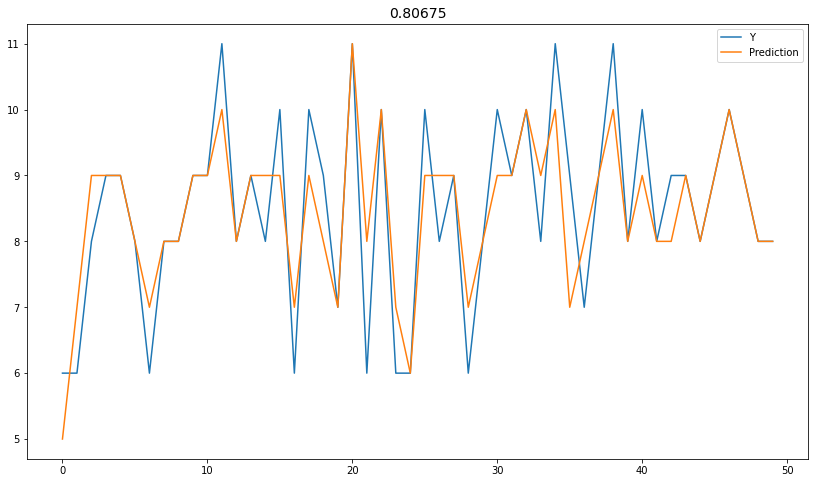

In [153]:
#SUM
y_sum = joblib.load('y_sum')
y_sum_pred = joblib.load('y_pred_sum')

y_sum_diff = y_sum - y_sum_pred
y_sum_diff = np.absolute(y_sum_diff)

plt.figure(figsize=(14,8))
plt.plot(y_sum[:50], label="Y")
plt.plot(y_sum_pred[:50], label='Prediction')
plt.title("0.80675", fontsize=14)
plt.legend()
plt.show()

In [154]:
#quadratic_weighted_kappa(y_sum, y_sum_pred)

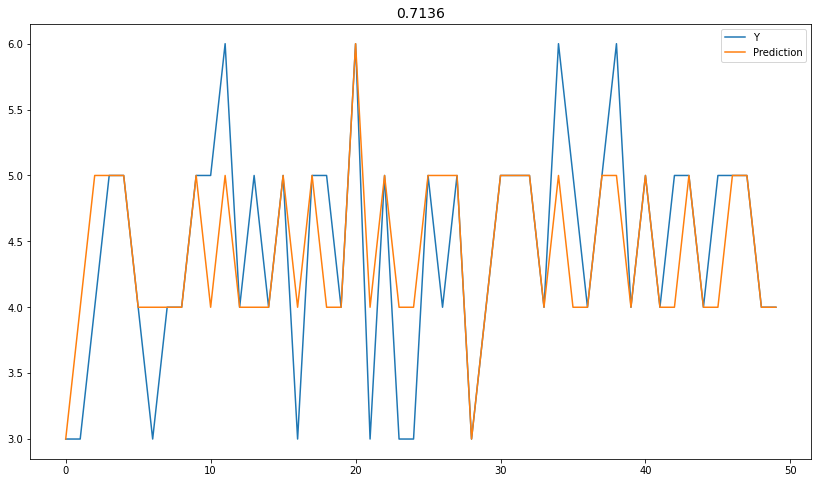

In [155]:
#HIGHER
y_higher = joblib.load('y_higher')
y_higher_pred = joblib.load('y_pred_higher')

y_higher_diff = y_higher - y_higher_pred
y_higher_diff = np.absolute(y_higher_diff)

plt.figure(figsize=(14,8))
plt.plot(y_higher[:50], label="Y")
plt.plot(y_higher_pred[:50], label='Prediction')
plt.title("0.7136", fontsize=14)
plt.legend()
plt.show()

In [156]:
#quadratic_weighted_kappa(y_higher, y_higher_pred)

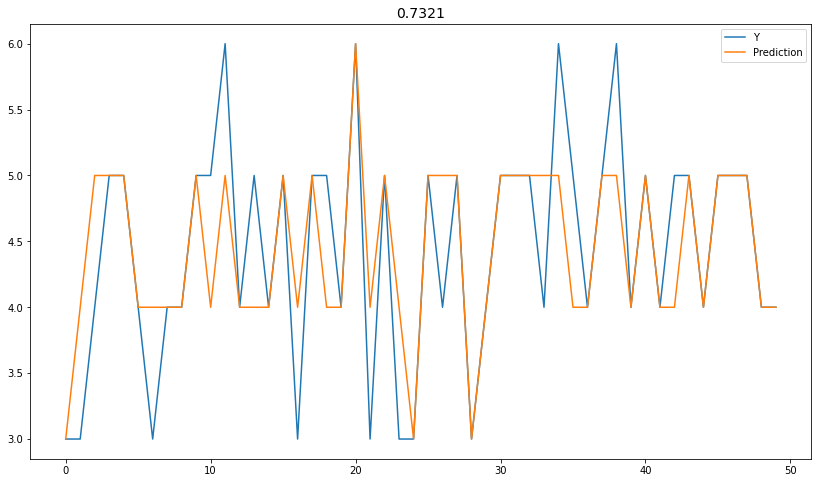

In [157]:
#MEAN
y_mean = joblib.load('y_mean')
y_mean_pred = joblib.load('y_pred_mean')

y_mean_diff = y_mean - y_mean_pred
y_mean_diff = np.absolute(y_mean_diff)

plt.figure(figsize=(14,8))
plt.plot(y_mean[:50], label="Y")
plt.plot(y_mean_pred[:50], label='Prediction')
plt.title("0.7321", fontsize=14)
plt.legend()
plt.show()

In [158]:
#quadratic_weighted_kappa(y_mean, y_mean_pred)

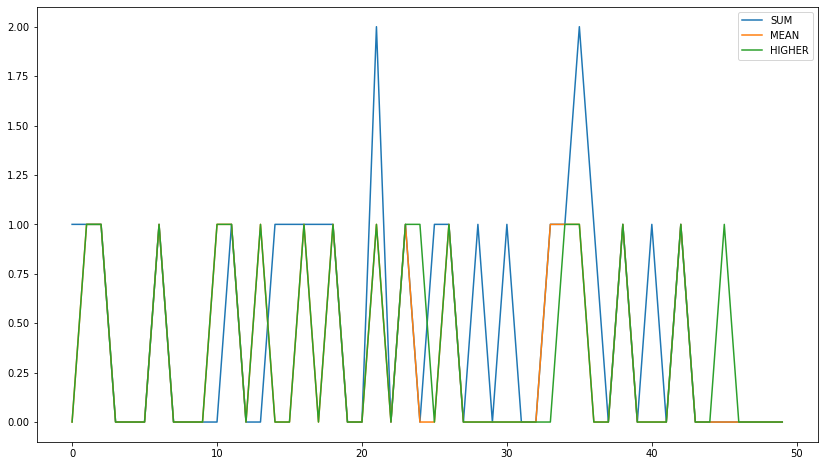

In [159]:
#DIFFERENCE

plt.figure(figsize=(14,8))
plt.plot(y_sum_diff[:50], label="SUM")
plt.plot(y_mean_diff[:50], label='MEAN')
plt.plot(y_higher_diff[:50], label='HIGHER')

plt.legend()
plt.show()

In [160]:
from collections import Counter
Counter(y_sum_diff)

Counter({1.0: 152, 0.0: 183, 2.0: 19, 3.0: 3})

In [161]:
Counter(y_mean_diff)

Counter({0.0: 256, 1.0: 99, 2.0: 2})

In [162]:
Counter(y_higher_diff)

Counter({0.0: 247, 1.0: 107, 2.0: 3})

### Total Difference SUM

In [163]:
np.sum(y_sum_diff)

199.0

### Total Difference MEAN

In [164]:
np.sum(y_mean_diff)

103.0

### Total Difference HIGHER

In [165]:
np.sum(y_higher_diff)

113.0

In [166]:
# MEAN
result = quadratic_weighted_kappa(y_mean, y_mean_pred)
qwk = result[0]
e = result[1]
w = result[2]
c = result[3]

In [167]:
# Mean
w

array([[0.  , 0.04, 0.16, 0.36, 0.64, 1.  ],
       [0.04, 0.  , 0.04, 0.16, 0.36, 0.64],
       [0.16, 0.04, 0.  , 0.04, 0.16, 0.36],
       [0.36, 0.16, 0.04, 0.  , 0.04, 0.16],
       [0.64, 0.36, 0.16, 0.04, 0.  , 0.04],
       [1.  , 0.64, 0.36, 0.16, 0.04, 0.  ]])

In [168]:
# Mean
e

array([[2.80112045e-03, 0.00000000e+00, 7.56302521e-02, 5.07002801e-01,
        3.86554622e-01, 2.80112045e-02],
       [1.12044818e-02, 0.00000000e+00, 3.02521008e-01, 2.02801120e+00,
        1.54621849e+00, 1.12044818e-01],
       [9.80392157e-02, 0.00000000e+00, 2.64705882e+00, 1.77450980e+01,
        1.35294118e+01, 9.80392157e-01],
       [4.70588235e-01, 0.00000000e+00, 1.27058824e+01, 8.51764706e+01,
        6.49411765e+01, 4.70588235e+00],
       [3.55742297e-01, 0.00000000e+00, 9.60504202e+00, 6.43893557e+01,
        4.90924370e+01, 3.55742297e+00],
       [6.16246499e-02, 0.00000000e+00, 1.66386555e+00, 1.11540616e+01,
        8.50420168e+00, 6.16246499e-01]])

In [169]:
# Mean
c

array([[  1,   0,   0,   0,   0,   0],
       [  0,   0,   3,   1,   0,   0],
       [  0,   0,  19,  16,   0,   0],
       [  0,   0,   5, 137,  26,   0],
       [  0,   0,   0,  26,  95,   6],
       [  0,   0,   0,   1,  17,   4]])

In [170]:
np.count_nonzero(c) / c.size

0.3888888888888889

In [171]:
nominator_mean = np.sum(w*c)
nominator_mean

4.28

In [172]:
denominator_mean = np.sum(w*e)
denominator_mean

15.974565826330531

In [173]:
1 - (nominator_mean / denominator_mean)

0.7320740953757022

In [174]:
# SUM
result = quadratic_weighted_kappa(y_sum, y_sum_pred)
qwk = result[0]
e = result[1]
w = result[2]
c = result[3]

In [175]:
# SUM
w

array([[0.  , 0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49, 0.64, 0.81, 1.  ],
       [0.01, 0.  , 0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49, 0.64, 0.81],
       [0.04, 0.01, 0.  , 0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49, 0.64],
       [0.09, 0.04, 0.01, 0.  , 0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49],
       [0.16, 0.09, 0.04, 0.01, 0.  , 0.01, 0.04, 0.09, 0.16, 0.25, 0.36],
       [0.25, 0.16, 0.09, 0.04, 0.01, 0.  , 0.01, 0.04, 0.09, 0.16, 0.25],
       [0.36, 0.25, 0.16, 0.09, 0.04, 0.01, 0.  , 0.01, 0.04, 0.09, 0.16],
       [0.49, 0.36, 0.25, 0.16, 0.09, 0.04, 0.01, 0.  , 0.01, 0.04, 0.09],
       [0.64, 0.49, 0.36, 0.25, 0.16, 0.09, 0.04, 0.01, 0.  , 0.01, 0.04],
       [0.81, 0.64, 0.49, 0.36, 0.25, 0.16, 0.09, 0.04, 0.01, 0.  , 0.01],
       [1.  , 0.81, 0.64, 0.49, 0.36, 0.25, 0.16, 0.09, 0.04, 0.01, 0.  ]])

In [176]:
# SUM
e

array([[0.00000000e+00, 2.80112045e-03, 0.00000000e+00, 2.80112045e-03,
        4.76190476e-02, 1.34453782e-01, 3.44537815e-01, 2.91316527e-01,
        1.40056022e-01, 3.64145658e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.12044818e-02, 0.00000000e+00, 1.12044818e-02,
        1.90476190e-01, 5.37815126e-01, 1.37815126e+00, 1.16526611e+00,
        5.60224090e-01, 1.45658263e-01, 0.00000000e+00],
       [0.00000000e+00, 1.96078431e-02, 0.00000000e+00, 1.96078431e-02,
        3.33333333e-01, 9.41176471e-01, 2.41176471e+00, 2.03921569e+00,
        9.80392157e-01, 2.54901961e-01, 0.00000000e+00],
       [0.00000000e+00, 7.84313725e-02, 0.00000000e+00, 7.84313725e-02,
        1.33333333e+00, 3.76470588e+00, 9.64705882e+00, 8.15686275e+00,
        3.92156863e+00, 1.01960784e+00, 0.00000000e+

In [177]:
c.shape

(11, 11)

In [178]:
c

array([[ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  7, 17,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17, 14,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 11, 87, 35,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 14, 39,  8,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  4, 26, 29,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1, 11,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  3,  0]])

In [179]:
confusion_matrix(y_sum, y_sum_pred.astype(int))

[[0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 7, 17, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 17, 14, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 11, 87, 35, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 14, 39, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 4, 26, 29, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 11, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [180]:
# SUM
c

array([[ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  7, 17,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17, 14,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 11, 87, 35,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 14, 39,  8,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  4, 26, 29,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1, 11,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  3,  0]])

In [181]:
np.count_nonzero(c) / c.size

0.2727272727272727

In [182]:
nominator_sum = np.sum(w*c)
nominator_sum

2.5500000000000003

In [183]:
denominator_sum = np.sum(w*e)
denominator_sum

13.195714285714285

In [184]:
1 - (nominator_sum / denominator_sum)

0.8067554400779473

In [185]:
nominator_mean - nominator_sum

1.73

In [186]:
denominator_mean - denominator_sum

2.7788515406162464

In [2]:
def weighted_matrix(N):
    weighted = np.zeros((N,N)) 
    for i in range(len(weighted)):
        for j in range(len(weighted)):
            weighted[i][j] = float(((i-j)**2)/(N-1)**2) 
    return weighted

weighted_matrix(3)

array([[0.  , 0.25, 1.  ],
       [0.25, 0.  , 0.25],
       [1.  , 0.25, 0.  ]])